In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def func(x):
    return 2*x**2 + 4*x -2

In [4]:
func(4)

46

In [5]:
# Plot a graph of the function
x_vals = np.arange(-10, 10, 0.25)
y_vals = func(x_vals)

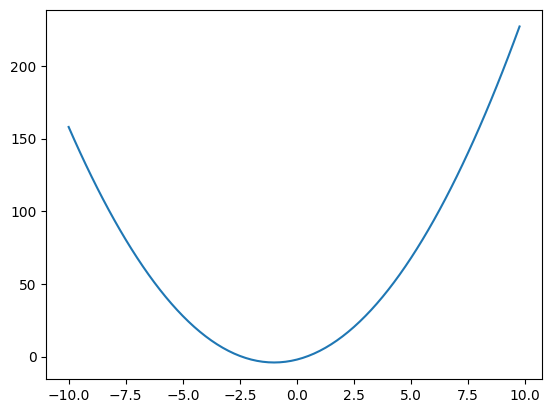

In [6]:
plt.plot(x_vals, y_vals)

In [7]:
# Finding slope
h = 0.0000000000001 # h os tending to 0
x = 5
slope = (func(x + h) - func(x)) / h
print(slope)

24.016344468691386


In [8]:
# Calculating partial derivatives
h = 0.0000000001

# inputs
a = 2.0
b = -7.0
c = 4.0

# Expression: a*b + c

inp = [a, b, c]
for i in range(len(inp)):
    d1 = inp[0]*inp[1] + inp[2]
    inp[i] += h
    d2 = inp[0]*inp[1] + inp[2]
    print("\nd1", d1)
    print("d2", d2)
    print("slope", (d2 - d1)/h)

# The above can be verified if we do a partial derivation of the expression with respect to a, b and c respectively and putting the other values


d1 -10.0
d2 -10.0000000007
slope -7.000000579182597

d1 -10.0000000007
d2 -10.0000000005
slope 2.000000165480742

d1 -10.0000000005
d2 -10.0000000004
slope 1.000000082740371


In [9]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')


In [10]:
a = Value(2.0)
b = Value(-7.0)
c = Value(4.0)
d = a * b + c
print(d)
print(d._prev)
print(d._op)

Value(data=-10.0)
{Value(data=-14.0), Value(data=4.0)}
+


In [11]:
# Visualize the operations
import graphviz
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR -> Left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # create an op node if this value is a result of some operation
            dot.node(name=uid+n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2))+n2._op)
    
    return dot

In [12]:
a = Value(2.0, label='a')
b = Value(-7.0, label='b')
c = Value(4.0, label='c')
e = a*b; e.label='e'
d = e+c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L

Value(data=20.0)

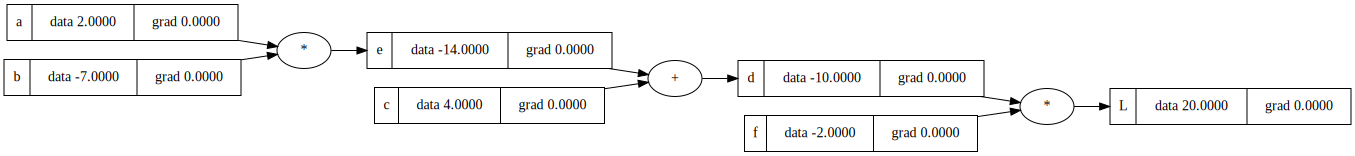

In [15]:
draw_dot(L)